how to generate gaussian/normal distributed random variable?

In [1]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy import stats
np.random.seed(34)
%matplotlib inline

In [2]:
#generating random variable , rv ~ N(3,(0.5)^2)
rv=np.random.normal(loc=3,scale=0.5,size=1000) 

In [3]:
rv.mean() # here mean of rv is approx 3 and is never exact value

2.9796523222733837

In [4]:
# same is the case with the standard deviation(std) of the random variable also
# it is approx 0.5
rv.std() 

0.4828738230881827

In [5]:
#plotting pdf and cdf of random variable using basic concepts(manually)

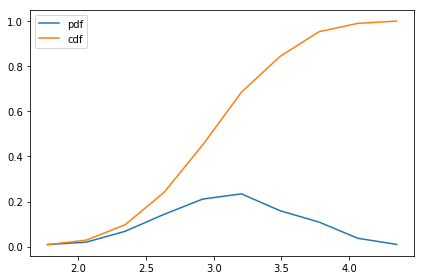

In [6]:
hist,edges=np.histogram(rv,bins=10)
probability=hist/np.sum(hist)
plt.plot(edges[1:],probability,label='pdf') #note no of edges produced is always 1 greater than bins,here we habe 11 edges for
#10 bins, thus neglecting first edge
plt.plot(edges[1:],np.cumsum(probability),label='cdf')
plt.legend()
plt.tight_layout()

In [7]:
# plotting pdf using seaborn kde plot
# there is no shortcut to plot cdf in seaborn , so use basic method to plot cdf or one can plot cdf using 
#plt.hist(cumulative:True)

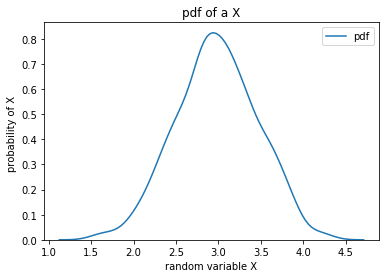

In [8]:
sns.kdeplot(rv,label='pdf')
plt.xlabel("random variable X")
plt.ylabel("probability of X ")
plt.title("pdf of a X")
plt.legend()


how to generate standard normal variate(Z) , Z ~ N(0,1) :

In [9]:
#plotting the pdf and cdf of a standard normal variate(Z) , Z ~ N(0,1) using basic method

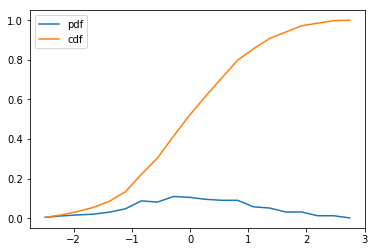

In [10]:
z=np.random.randn(1000)
bins_count,edges=np.histogram(z,bins=20)
probability=bins_count/np.sum(bins_count)
plt.plot(edges[1:],probability,label='pdf')
plt.plot(edges[1:],np.cumsum(probability),label='cdf')
plt.legend()

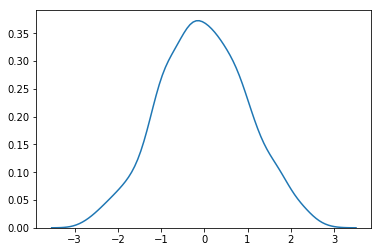

In [11]:
sns.kdeplot(z)

In [12]:
# plotting pdf and cdf of standard normal variate using scipy.stats module

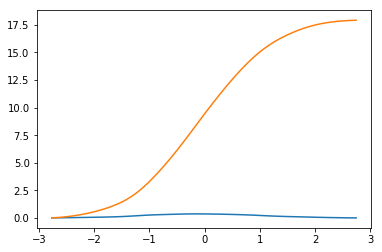

In [13]:
kde=stats.gaussian_kde(z) # here kde learns a function from the values(here,Z) and then can produce probabilty according to values(here,data) provided
data=np.linspace(z.min(),z.max(),100)
prob=kde(data)
plt.plot(data,prob)
cdf=prob.cumsum()
plt.plot(data,cdf)


In [14]:
# standardization process:it is the process of transforming normal/gausiaan random variable to standard normal variate(Z)

#  Data standardization is the process of rescaling one or more features so that they have a mean value of 0 
# and a standard deviation of 1. Standardization assumes that your data has a Gaussian (bell curve) distribution. 
# This does not strictly have to be true, but the technique is more effective if your feature distribution is Gaussian.


In [15]:
x=np.random.normal(loc=5,scale=0.5,size=1000)

Text(0.5,1,'pdf of rv ~ N(5,0.2**2)')

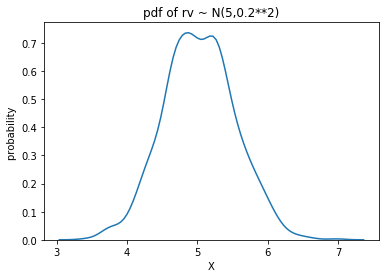

In [16]:
sns.kdeplot(data=x)
plt.xlabel('X')
plt.ylabel('probability ')
plt.title('pdf of rv ~ N(5,0.2**2)')

In [17]:
standard_x=(x-x.mean())/x.std()

Text(0.5,1,'pdf of rv after standardization (Z ~ N(0,1))')

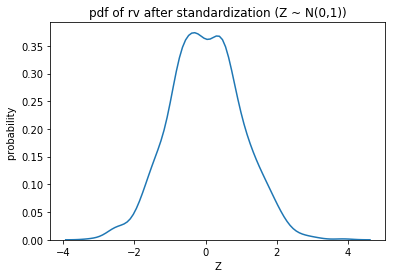

In [18]:
sns.kdeplot(standard_x)
plt.xlabel('Z')
plt.ylabel('probability ')
plt.title('pdf of rv after standardization (Z ~ N(0,1))')

In [19]:
# lets see if standardization works with uniform random variable or not

In [20]:
x=np.random.uniform(5,10,1000) #

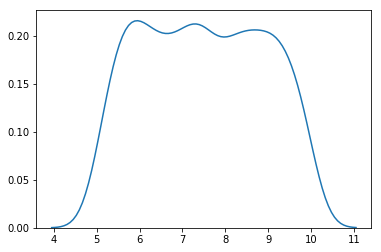

In [21]:
sns.kdeplot(x)

In [22]:
x_standard=(x-x.mean())/x.std()

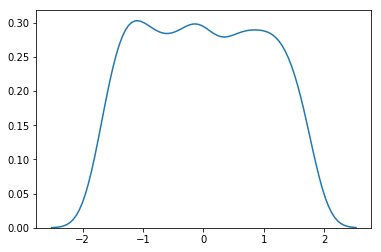

In [23]:
sns.kdeplot(x_standard)

In [24]:
x_standard.mean()

1.8474111129762604e-16

In [61]:
x_standard.std()

1.0

Sampling distribution & Central Limit theorem


Text(0.5,1,'Pareto Distribution')

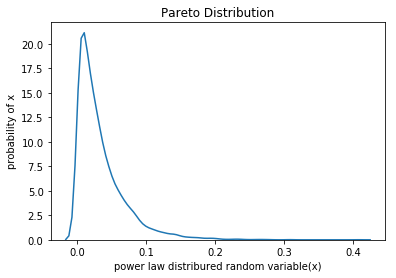

In [25]:
x=np.random.pareto(30,10000)
x_mean=x.mean()
x_std=x.std()
sns.kdeplot(x)
plt.xlabel('power law distribured random variable(x)')
plt.ylabel('probability of x')
plt.title('Pareto Distribution')

Text(0.5,1,'sampling distributin ')

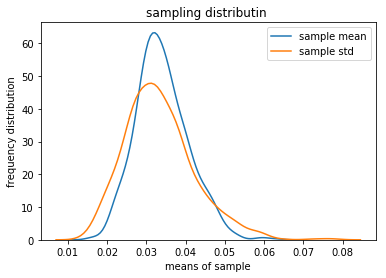

In [26]:
n=30 # sample size 
m=1000 # no of sample
sampling_distribution_of_sample_mean= np.empty(m)
sampling_distribution_of_sample_std=np.empty(m)
for i in range(m):
    sample=np.random.choice(x,30) # sampling from population(x) with sample size n
    sample_mean=sample.mean()
    sample_std=sample.std()
    sampling_distribution_of_sample_mean[i]=sample_mean
    sampling_distribution_of_sample_std[i]=sample_std
sns.kdeplot(sampling_distribution_of_sample_mean,label='sample mean')
sns.kdeplot(sampling_distribution_of_sample_std,label='sample std')
plt.xlabel('means of sample')
plt.ylabel('frequency distribution')
plt.title('sampling distributin ')

In [27]:
print('mean of x is {:.3f}'.format(x.mean()))
print('mean of sampling distribution is {:.3f}'.format(sampling_distribution_of_sample_mean.mean()))
print('std of x is {:.3f}'.format(x.std()))
print('std of sampling distribution is {:.3f}'.format(sampling_distribution_of_sample_mean.std()))
print('sigma/root(n) is {:.3f}'.format(x.std()/np.sqrt(n)))

mean of x is 0.034
mean of sampling distribution is 0.034
std of x is 0.035
std of sampling distribution is 0.007
sigma/root(n) is 0.006


how to determine if a random variable is normal distributed or not ?
so we have bunch of test like Q-Q plot , KS test and AD test to determine if a random variable is normal distributed or not .

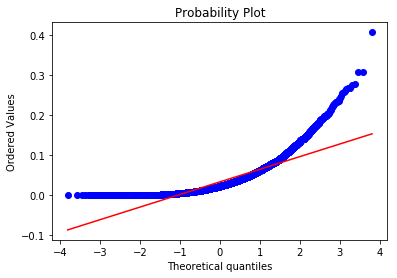

In [28]:
rv=stats.probplot(x,dist=stats.norm,plot=plt) # hence x is not a normally distributed random variable as it is pareto rv


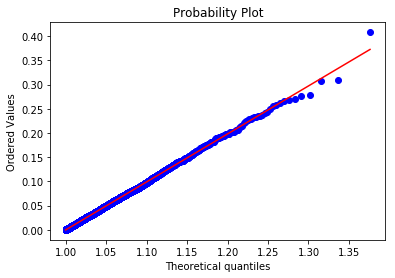

In [29]:
hey=stats.probplot(x,dist=stats.pareto(30),plot=plt)

In [34]:
# QQ-plot between normal rv and standard normal

Text(0,0.5,'normal random variable')

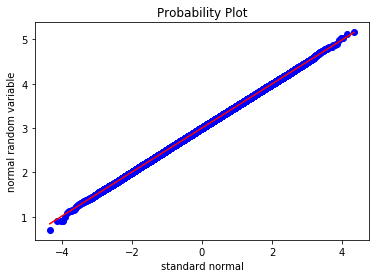

In [37]:
plot=stats.probplot(np.random.normal(3,0.5,100000),dist='norm',plot=plt)
plt.xlabel('standard normal')
plt.ylabel('normal random variable')

In [38]:
# generating QQ plot without using probplot

In [49]:
x=np.random.normal(3,0.5,10000000)

In [50]:
y=np.random.randn(1000)

In [51]:
x_percentile=np.empty(100)
y_percentile=np.empty(100)
for i in range(1,101):
    x_percentile[i-1]=np.percentile(x,i)
    y_percentile[i-1]=np.percentile(y,i)



Text(0,0.5,'normal variate')

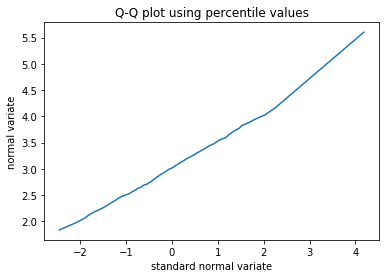

In [55]:
plt.plot(y_percentile,x_percentile)
plt.title('Q-Q plot using percentile values')
plt.xlabel('standard normal variate')
plt.ylabel('normal variate')

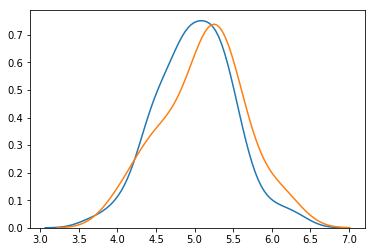

In [92]:
np.random.seed(22)
data=np.random.normal(5,0.5,150)
sns.kdeplot(data)
sns.kdeplot(np.random.choice(data,40))

In [93]:
# generating log normal distribution 

In [94]:
x=np.random.lognormal(5,0.5,10000)

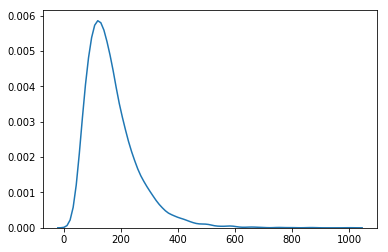

In [95]:
sns.kdeplot(x)

In [97]:
# Test for log normal: we know a rv is log normally distributed if ln(x) is normal distributed,so with the help of Q-Q plot 
# we can test whether a rv is log normal or not

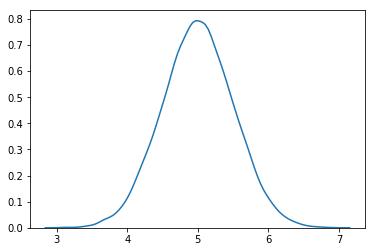

In [99]:
ln_x=np.log(x)
sns.kdeplot(ln_x)

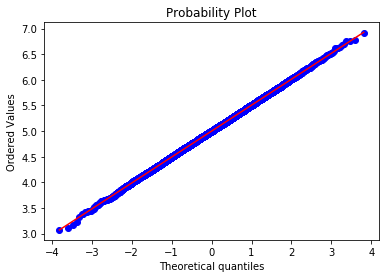

In [101]:
plot=stats.probplot(ln_x,dist='norm',plot=plt) # thus given random variable is log normal distributed

In [102]:
# how to generate pareto distributed rv

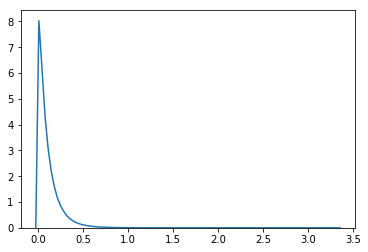

In [140]:
x=np.random.pareto(10,1000000)
sns.kdeplot(x)

In [141]:
# how to test a rv is pareto or power law distributed ?
# by using log-log plot

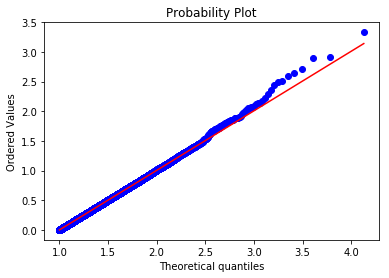

In [145]:
plot=stats.probplot(x,dist=stats.pareto(10),plot=plt) # but here is the problem we woudl not be know the value of alpha in real problems 
#then how to test for pareto distribution

In [143]:
# power transform(BoxCox transform): we know that boxcox transform of pareto distribution gives gaussian random variable 

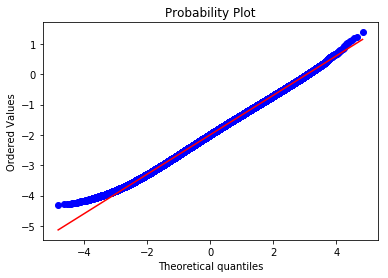

In [144]:
transformed_x,_=stats.boxcox(x)
plot=stats.probplot(transformed_x,dist='norm',plot=plt)